REGRESION LINEAL

In [5]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("base_datos_2008.csv")

In [9]:
df = df.dropna(subset=['ArrDelay'])
df = df.sample(frac=1).head(100000)
Y = df["ArrDelay"]
X = df[["DepDelay"]]

In [10]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [11]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

print("Coeficientes: " ,regr.coef_)
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y,Y_pred))

Coeficientes:  [1.01751197]
R cuadrado:  0.8682956710900985


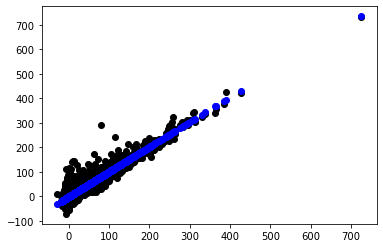

In [15]:
plt.scatter(X[1:10000], Y[1:10000], color='black')
plt.scatter(X[1:10000], Y_pred[1:10000], color='blue')
plt.show()

PARA VARIABLES CATEGORICAS 

In [19]:
X = df[['AirTime','Distance','TaxiIn','TaxiOut']]

df["Month"] = df["Month"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["DayOfWeek"] = df["DayOfWeek"].apply(str)

dummies = pd.get_dummies(data=df[['Month','DayofMonth','DayOfWeek','Origin','Dest']])
X=dummies.add(X,fill_value=0)

In [20]:
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=651)

In [21]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

Y_pred = regr.predict(X)
print("R cuadrado:", r2_score(Y, Y_pred))

R cuadrado: 0.17879463824969044


In [22]:
X = X.add(df[["DepDelay"]],fill_value=0)

In [23]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

Y_pred = regr.predict(X)
print("R cuadrado:", r2_score(Y, Y_pred))

R cuadrado: 0.9714004867762241
